In [47]:
import pandas as pd

#  Leer dataset 
df = pd.read_csv("dataset_comunidades_senasoft.csv")

In [48]:
print("Dimensiones:", df.shape)
print("\nColumnas originales:\n", df.columns.tolist())

Dimensiones: (10000, 12)

Columnas originales:
 ['ID', 'Nombre', 'Edad', 'Género', 'Ciudad', 'Comentario', 'Categoría del problema', 'Nivel de urgencia', 'Fecha del reporte', 'Acceso a internet', 'Atención previa del gobierno', 'Zona rural']


In [49]:
df.columns = (
    df.columns
    .str.strip()                     # Quita espacios
    .str.lower()                     # Todo minúsculas
    .str.replace(" ", "_")           # Espacios → guiones bajos
    .str.replace("á", "a")
    .str.replace("é", "e")
    .str.replace("í", "i")
    .str.replace("ó", "o")
    .str.replace("ú", "u")
)


In [50]:
df

,id,nombre,edad,genero,ciudad,comentario,categoria_del_problema,nivel_de_urgencia,fecha_del_reporte,acceso_a_internet,atencion_previa_del_gobierno,zona_rural
0,1,Jorge,23.0,Otro,Manizales,las calles están muy oscuras y peligrosas.,Salud,Urgente,2023-08-11,0,1,0
1,2,Camilo,40.0,Otro,Santa Marta,no tenemos centros culturales ni bibliotecas.,Medio Ambiente,No urgente,2023-04-12,1,1,1
2,3,Pedro,35.0,Otro,Medellín,las basuras no se recogen a tiempo.,Medio Ambiente,No urgente,2023-06-09,1,1,0
3,4,Ana,NaN,F,Bogotá,la contaminación del río está aumentando.,Seguridad,No urgente,2023-06-04,0,1,1
4,5,Jorge,62.0,M,Manizales,no hay suficientes escuelas públicas.,Seguridad,Urgente,2024-07-10,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Pedro,54.0,M,Bucaramanga,hay problemas con la recolección de basura.,Medio Ambiente,No urgente,2023-05-13,0,1,0
9996,9997,Carlos,40.0,Otro,Cúcuta,hay problemas con la recolección de basura.,Medio Ambiente,Urgente,2024-09-30,0,0,0
9997,9998,María,56.0,Otro,Cali,NaN,Medio Ambiente,No urgente,2024-01-26,1,1,0
9998,9999,Carlos,42.0,Otro,Barranquilla,faltan médicos en el centro de salud.,Salud,No urgente,2024-03-19,1,0,0


In [51]:
print("\nValores nulos por columna:")
print(df.isnull().sum())

print("\nDuplicados:", df.duplicated().sum())



Valores nulos por columna:
id                                0
nombre                            0
edad                            675
genero                          461
ciudad                          136
comentario                      638
categoria_del_problema            0
nivel_de_urgencia                 0
fecha_del_reporte                 0
acceso_a_internet                 0
atencion_previa_del_gobierno      0
zona_rural                        0
dtype: int64

Duplicados: 0


In [52]:
df["fecha_del_reporte"] = pd.to_datetime(df["fecha_del_reporte"], errors="coerce")


In [53]:
print("\nTipos de datos actualizados:")
print(df.dtypes)



Tipos de datos actualizados:
id                                       int64
nombre                                  object
edad                                   float64
genero                                  object
ciudad                                  object
comentario                              object
categoria_del_problema                  object
nivel_de_urgencia                       object
fecha_del_reporte               datetime64[ns]
acceso_a_internet                        int64
atencion_previa_del_gobierno             int64
zona_rural                               int64
dtype: object


In [54]:
# reemplazos
df["edad"] = df["edad"].fillna(df["edad"].median())
df["genero"] = df["genero"].fillna("no_especificado")
df["ciudad"] = df["ciudad"].fillna("no_registrada")
df["comentario"] = df["comentario"].fillna("sin_comentario")


In [55]:
df

,id,nombre,edad,genero,ciudad,comentario,categoria_del_problema,nivel_de_urgencia,fecha_del_reporte,acceso_a_internet,atencion_previa_del_gobierno,zona_rural
0,1,Jorge,23.0,Otro,Manizales,las calles están muy oscuras y peligrosas.,Salud,Urgente,2023-08-11,0,1,0
1,2,Camilo,40.0,Otro,Santa Marta,no tenemos centros culturales ni bibliotecas.,Medio Ambiente,No urgente,2023-04-12,1,1,1
2,3,Pedro,35.0,Otro,Medellín,las basuras no se recogen a tiempo.,Medio Ambiente,No urgente,2023-06-09,1,1,0
3,4,Ana,48.0,F,Bogotá,la contaminación del río está aumentando.,Seguridad,No urgente,2023-06-04,0,1,1
4,5,Jorge,62.0,M,Manizales,no hay suficientes escuelas públicas.,Seguridad,Urgente,2024-07-10,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Pedro,54.0,M,Bucaramanga,hay problemas con la recolección de basura.,Medio Ambiente,No urgente,2023-05-13,0,1,0
9996,9997,Carlos,40.0,Otro,Cúcuta,hay problemas con la recolección de basura.,Medio Ambiente,Urgente,2024-09-30,0,0,0
9997,9998,María,56.0,Otro,Cali,sin_comentario,Medio Ambiente,No urgente,2024-01-26,1,1,0
9998,9999,Carlos,42.0,Otro,Barranquilla,faltan médicos en el centro de salud.,Salud,No urgente,2024-03-19,1,0,0


In [56]:
print("\nValores nulos por columna:")
print(df.isnull().sum())

print("\nDuplicados:", df.duplicated().sum())


Valores nulos por columna:
id                              0
nombre                          0
edad                            0
genero                          0
ciudad                          0
comentario                      0
categoria_del_problema          0
nivel_de_urgencia               0
fecha_del_reporte               0
acceso_a_internet               0
atencion_previa_del_gobierno    0
zona_rural                      0
dtype: int64

Duplicados: 0


In [57]:
df["categoria_del_problema"] = (
    df["categoria_del_problema"]
    .astype(str)
    .str.strip()
    .str.lower()
    .str.replace("á", "a")
    .str.replace("é", "e")
    .str.replace("í", "i")
    .str.replace("ó", "o")
    .str.replace("ú", "u")
)


In [58]:
df.to_csv("dataset_limpio_general.csv", index=False)
print(" Dataset limpio guardado como 'dataset_limpio_general.csv'")


 Dataset limpio guardado como 'dataset_limpio_general.csv'


In [59]:
print("Categorías únicas:")
print(df["categoria_del_problema"].unique())


Categorías únicas:
['salud' 'medio ambiente' 'seguridad' 'educacion']


In [60]:
df

,id,nombre,edad,genero,ciudad,comentario,categoria_del_problema,nivel_de_urgencia,fecha_del_reporte,acceso_a_internet,atencion_previa_del_gobierno,zona_rural
0,1,Jorge,23.0,Otro,Manizales,las calles están muy oscuras y peligrosas.,salud,Urgente,2023-08-11,0,1,0
1,2,Camilo,40.0,Otro,Santa Marta,no tenemos centros culturales ni bibliotecas.,medio ambiente,No urgente,2023-04-12,1,1,1
2,3,Pedro,35.0,Otro,Medellín,las basuras no se recogen a tiempo.,medio ambiente,No urgente,2023-06-09,1,1,0
3,4,Ana,48.0,F,Bogotá,la contaminación del río está aumentando.,seguridad,No urgente,2023-06-04,0,1,1
4,5,Jorge,62.0,M,Manizales,no hay suficientes escuelas públicas.,seguridad,Urgente,2024-07-10,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Pedro,54.0,M,Bucaramanga,hay problemas con la recolección de basura.,medio ambiente,No urgente,2023-05-13,0,1,0
9996,9997,Carlos,40.0,Otro,Cúcuta,hay problemas con la recolección de basura.,medio ambiente,Urgente,2024-09-30,0,0,0
9997,9998,María,56.0,Otro,Cali,sin_comentario,medio ambiente,No urgente,2024-01-26,1,1,0
9998,9999,Carlos,42.0,Otro,Barranquilla,faltan médicos en el centro de salud.,salud,No urgente,2024-03-19,1,0,0


In [61]:
df_educacion = df[df["categoria_del_problema"] == "educacion"]


In [62]:
#  Verificar cuántos registros tiene
print("Dimensiones del dataset educativo:", df_educacion.shape)
print("\nPrimeras filas del dataset educativo:")
print(df_educacion.head())

Dimensiones del dataset educativo: (2509, 12)

Primeras filas del dataset educativo:
    id nombre  edad genero     ciudad                             comentario  \
7    8  Jorge  38.0      F     Bogotá  no hay suficientes escuelas públicas.   
10  11  Pedro  46.0   Otro     Bogotá    falta agua potable en varias casas.   
13  14  Sofía  72.0      F     Bogotá  no hay suficientes escuelas públicas.   
14  15  Laura  67.0      F  Manizales    falta agua potable en varias casas.   
18  19  Sofía  48.0      F  Manizales                         sin_comentario   

   categoria_del_problema nivel_de_urgencia fecha_del_reporte  \
7               educacion           Urgente        2023-04-23   
10              educacion           Urgente        2024-04-02   
13              educacion        No urgente        2023-08-19   
14              educacion           Urgente        2024-08-16   
18              educacion           Urgente        2023-11-02   

    acceso_a_internet  atencion_previa_del_

In [63]:
# Guardar el dataset educativo limpio
df_educacion.to_csv("dataset_educacion_limpio.csv", index=False)

In [64]:
print(df_educacion.info())
print("\nValores nulos por columna:\n", df_educacion.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 2509 entries, 7 to 9988
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   id                            2509 non-null   int64         
 1   nombre                        2509 non-null   object        
 2   edad                          2509 non-null   float64       
 3   genero                        2509 non-null   object        
 4   ciudad                        2509 non-null   object        
 5   comentario                    2509 non-null   object        
 6   categoria_del_problema        2509 non-null   object        
 7   nivel_de_urgencia             2509 non-null   object        
 8   fecha_del_reporte             2509 non-null   datetime64[ns]
 9   acceso_a_internet             2509 non-null   int64         
 10  atencion_previa_del_gobierno  2509 non-null   int64         
 11  zona_rural                    2509 

In [65]:
# Convertir a booleanos las columnas binarias 
df_educacion["acceso_a_internet"] = df_educacion["acceso_a_internet"].astype(bool)
df_educacion["atencion_previa_del_gobierno"] = df_educacion["atencion_previa_del_gobierno"].astype(bool)
df_educacion["zona_rural"] = df_educacion["zona_rural"].astype(bool)




C:\Users\SENA\AppData\Local\Temp\ipykernel_2128\832851901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_educacion["acceso_a_internet"] = df_educacion["acceso_a_internet"].astype(bool)
C:\Users\SENA\AppData\Local\Temp\ipykernel_2128\832851901.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_educacion["atencion_previa_del_gobierno"] = df_educacion["atencion_previa_del_gobierno"].astype(bool)
C:\Users\SENA\AppData\Local\Temp\ipykernel_2128\832851901.py:4: SettingWithCopyWarning: 
A value is tryi

In [66]:
# convertir edad a int 
df_educacion["edad"] = df_educacion["edad"].astype(int)


C:\Users\SENA\AppData\Local\Temp\ipykernel_2128\2103909882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_educacion["edad"] = df_educacion["edad"].astype(int)


In [67]:
# Variables categóricas
df_educacion["genero"] = df_educacion["genero"].astype("category")
df_educacion["categoria_del_problema"] = df_educacion["categoria_del_problema"].astype("category")
df_educacion["nivel_de_urgencia"] = df_educacion["nivel_de_urgencia"].astype("category")


C:\Users\SENA\AppData\Local\Temp\ipykernel_2128\762062917.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_educacion["genero"] = df_educacion["genero"].astype("category")
C:\Users\SENA\AppData\Local\Temp\ipykernel_2128\762062917.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_educacion["categoria_del_problema"] = df_educacion["categoria_del_problema"].astype("category")
C:\Users\SENA\AppData\Local\Temp\ipykernel_2128\762062917.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [68]:
# Verificamos tipos de datos finales
print("Tipos de datos finales:\n")
print(df_educacion.dtypes)

Tipos de datos finales:

id                                       int64
nombre                                  object
edad                                     int64
genero                                category
ciudad                                  object
comentario                              object
categoria_del_problema                category
nivel_de_urgencia                     category
fecha_del_reporte               datetime64[ns]
acceso_a_internet                         bool
atencion_previa_del_gobierno              bool
zona_rural                                bool
dtype: object


In [69]:
df_educacion.to_csv("dataset_educacion_final.csv", index=False)

# Análisis Exploratorio de Datos Educativos

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns


# Revisar estructura
print("Dimensiones:", df_educacion.shape)
print("\nTipos de datos:\n", df_educacion.dtypes)
print("\nResumen estadístico:")
print(df_educacion.describe(include="all"))


Dimensiones: (2509, 12)

Tipos de datos:
 id                                       int64
nombre                                  object
edad                                     int64
genero                                category
ciudad                                  object
comentario                              object
categoria_del_problema                category
nivel_de_urgencia                     category
fecha_del_reporte               datetime64[ns]
acceso_a_internet                         bool
atencion_previa_del_gobierno              bool
zona_rural                                bool
dtype: object

Resumen estadístico:
                 id nombre         edad genero   ciudad  \
count   2509.000000   2509  2509.000000   2509     2509   
unique          NaN     10          NaN      4       11   
top             NaN  Laura          NaN      F  Pereira   
freq            NaN    271          NaN    811      271   
mean    4966.108808    NaN    47.695098    NaN      NaN   
min 

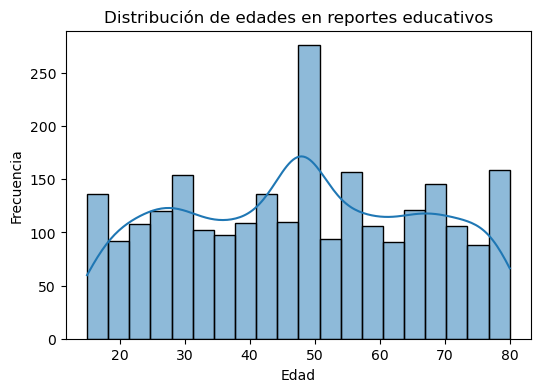

In [71]:
#Distribuciones de edades
plt.figure(figsize=(6,4))
sns.histplot(df_educacion["edad"], bins=20, kde=True)
plt.title("Distribución de edades en reportes educativos")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()


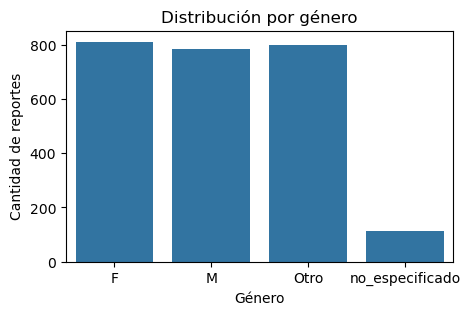

In [72]:
# Distribucion por genero
plt.figure(figsize=(5,3))
sns.countplot(x="genero", data=df_educacion)
plt.title("Distribución por género")
plt.xlabel("Género")
plt.ylabel("Cantidad de reportes")
plt.show()


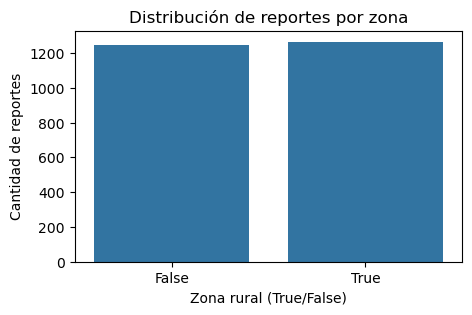

In [73]:
plt.figure(figsize=(5,3))
sns.countplot(x="zona_rural", data=df_educacion)
plt.title("Distribución de reportes por zona")
plt.xlabel("Zona rural (True/False)")
plt.ylabel("Cantidad de reportes")
plt.show()


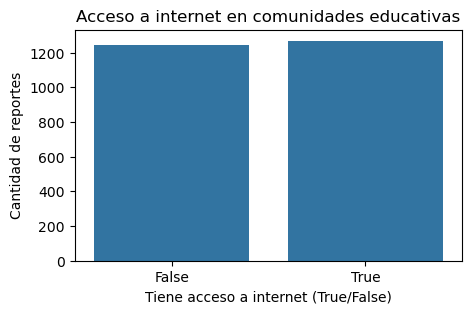

In [74]:
#Acceso a internet
plt.figure(figsize=(5,3))
sns.countplot(x="acceso_a_internet", data=df_educacion)
plt.title("Acceso a internet en comunidades educativas")
plt.xlabel("Tiene acceso a internet (True/False)")
plt.ylabel("Cantidad de reportes")
plt.show()


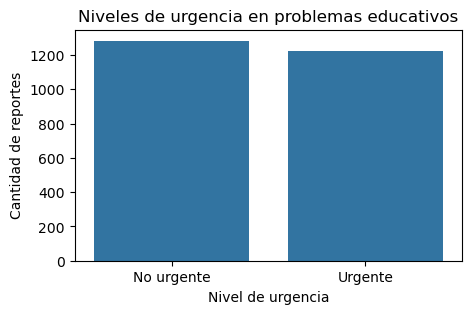

In [75]:
plt.figure(figsize=(5,3))
sns.countplot(x="nivel_de_urgencia", data=df_educacion, order=df_educacion["nivel_de_urgencia"].value_counts().index)
plt.title("Niveles de urgencia en problemas educativos")
plt.xlabel("Nivel de urgencia")
plt.ylabel("Cantidad de reportes")
plt.show()


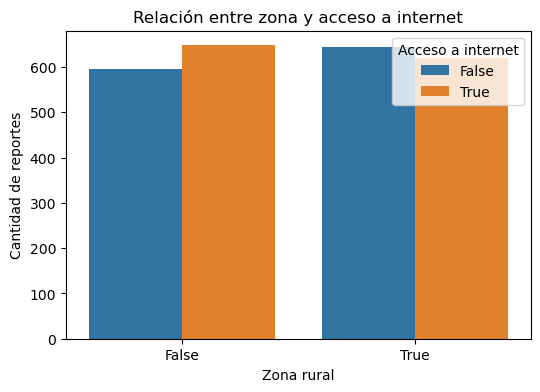

In [76]:
plt.figure(figsize=(6,4))
sns.countplot(x="zona_rural", hue="acceso_a_internet", data=df_educacion)
plt.title("Relación entre zona y acceso a internet")
plt.xlabel("Zona rural")
plt.ylabel("Cantidad de reportes")
plt.legend(title="Acceso a internet", loc="upper right")
plt.show()


C:\Users\SENA\AppData\Local\Temp\ipykernel_2128\113933312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_educacion["anio"] = df_educacion["fecha_del_reporte"].dt.year


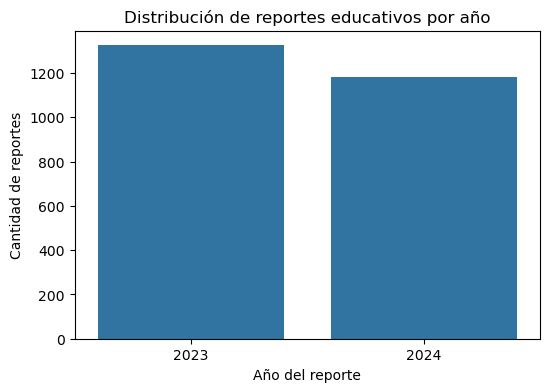

In [77]:
df_educacion["anio"] = df_educacion["fecha_del_reporte"].dt.year

plt.figure(figsize=(6,4))
sns.countplot(x="anio", data=df_educacion)
plt.title("Distribución de reportes educativos por año")
plt.xlabel("Año del reporte")
plt.ylabel("Cantidad de reportes")
plt.show()


In [78]:
# Lista de palabras clave relacionadas con educación
palabras_educacion = [
    "escuela", "colegio", "profesor", "docente", "estudiante",
    "clases", "educacion", "aprendizaje", "universidad", "formacion",
    "institucion", "aula", "estudio", "biblioteca", "material",
    "maestro", "capacitacion", "aprendiz", "ensenanza", "escuelas"
]

In [79]:
# Función de filtrado por palabras clave
def es_educativo(texto):
    #Devuelve True si el comentario contiene términos relacionados con educación"""
    if isinstance(texto, str):
        texto_lower = texto.lower()
        return any(palabra in texto_lower for palabra in palabras_educacion)
    return False

In [80]:
#  Filtrar los registros no educativos
df_educacion_filtrado = df_educacion[df_educacion["comentario"].apply(es_educativo)].copy()

print(f"Registros educativos después del filtrado: {len(df_educacion_filtrado)}")

Registros educativos después del filtrado: 458


In [81]:
#  Crear columna 'comentario_enriquecido'
def crear_comentario_enriquecido(fila):
    zona = "zona rural" if fila["zona_rural"] else "zona urbana"
    internet = "con acceso a internet" if fila["acceso_a_internet"] else "sin acceso a internet"
    urgencia = (
        fila["nivel_de_urgencia"].lower()
        if isinstance(fila["nivel_de_urgencia"], str)
        else "no especificada"
    )
    
    edad = (
        int(fila["edad"])
        if pd.notnull(fila["edad"])
        else "una persona de edad no especificada"
    )

    texto = (
        f"Persona de {edad} años vive en una {zona} {internet}. "
        f"Reporta un problema educativo con urgencia {urgencia}. "
        f"Comentario original: {fila['comentario']}"
    )
    return texto

df_educacion_filtrado["comentario_enriquecido"] = df_educacion_filtrado.apply(crear_comentario_enriquecido, axis=1)


In [82]:
print("\n Limpieza completada.")
print("Longitud promedio del texto enriquecido:", df_educacion_filtrado["comentario_enriquecido"].str.len().mean())
print("\nEjemplo aleatorio:")
print(df_educacion_filtrado.sample(92)["comentario_enriquecido"].values[0])


 Limpieza completada.
Longitud promedio del texto enriquecido: 180.9410480349345

Ejemplo aleatorio:
Persona de 21 años vive en una zona urbana sin acceso a internet. Reporta un problema educativo con urgencia urgente. Comentario original: no hay suficientes escuelas públicas.


In [84]:
#Guardar dataset
df_educacion_filtrado.to_csv("dataset_educacion_final.csv", index=False, encoding="utf-8")
